In [139]:
import numpy as np
from matplotlib import pyplot as plt
import os
from matplotlib import cm

In [60]:
'data_L0.3_W5.raw'[:-4]

'data_L0.3_W5'

# 100 files seen


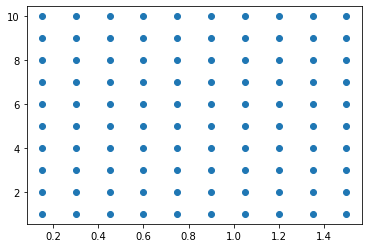

In [75]:
fdir = './gmid_test'
flist =  []
lwlist = []
for fname in os.listdir(fdir):
    if fname.startswith('data'):
        flist.append(fname)
        parts = fname[:-4].split('_') # Strip .raw extension
        if len(parts) != 3:
            print('Warning: malformed file name: ', fname)
        L = float(parts[1][1:])
        W = float(parts[2][1:])
        lwlist.append((L,W))
        
# This scatter plot is meant for the user to spot unsupported device sizes
plt.scatter(*zip(*lwlist));
fcount = len(flist) 
print('#',fcount,'files seen')

In [140]:
vgs_list_all = []
cgb_list_all = []
cgd_list_all = []
cgs_list_all = []
gds_list_all = []
gm_list_all  = []
id_list_all  = []
vth_list_all = []


for fname in flist:
    # Read File
    # fname = './data_nfet_01v8_aM01_W1p00L0p15NF1.raw'
    f = open(fdir+'/'+fname,'r')
    lines = f.readlines()
    f.close()
    
    # Count Lines
    count = 0
    for line in lines:
        count = count + 1
        if line.startswith('Values'):
            break
    # print('Record starting at: ', count)
    lines_1 = lines[count:]
    
    # Populate List
    vgs_list = []
    cgb_list = []
    cgd_list = []
    cgs_list = []
    gds_list = []
    gm_list  = []
    id_list  = []
    vth_list = []
    count = 0
    for line in lines_1:
        line = line[:-1].split('\t')
        if(len(line)>1):
            if(line[0]!=''):
                count = 0
                # print(line[0])
                value = float(line[1])
                
            elif line[1]!='' :
                count = count + 1
                value = float(line[1])
                
            if count == 0:
                vgs_list.append(value)
            elif count == 1:
                cgb_list.append(value)
            elif count == 2:
                cgd_list.append(value)
            elif count == 3:
                cgs_list.append(value)
            elif count == 4:
                gds_list.append(value)
            elif count == 5:
                gm_list.append(value)
            elif count == 6:
                id_list.append(value)
            elif count == 7:
                vth_list.append(value)
            else:
                print('WTF')
                
    # Populate top-level list
    vgs_list_all.append(vgs_list)
    cgb_list_all.append(cgb_list)
    cgd_list_all.append(cgd_list)
    cgs_list_all.append(cgs_list)
    gds_list_all.append(gds_list)
    gm_list_all. append(gm_list)
    id_list_all. append(id_list)
    vth_list_all.append(vth_list)
# Convert to np.array

vgs_list_all = np.array(vgs_list_all)
cgb_list_all = np.array(cgb_list_all)
cgd_list_all = np.array(cgd_list_all)
cgs_list_all = np.array(cgs_list_all)
gds_list_all = np.array(gds_list_all)
gm_list_all  = np.array(gm_list_all)
id_list_all  = np.array(id_list_all)
vth_list_all = np.array(vth_list_all)

at 17 L 1.05 W 1.0 chosen
at 23 L 0.15 W 1.0 chosen
at 29 L 0.6 W 1.0 chosen
at 35 L 0.9 W 1.0 chosen
at 43 L 1.35 W 1.0 chosen
at 60 L 0.3 W 1.0 chosen
at 66 L 0.45 W 1.0 chosen
at 76 L 1.5 W 1.0 chosen
at 83 L 0.75 W 1.0 chosen
at 90 L 1.2 W 1.0 chosen


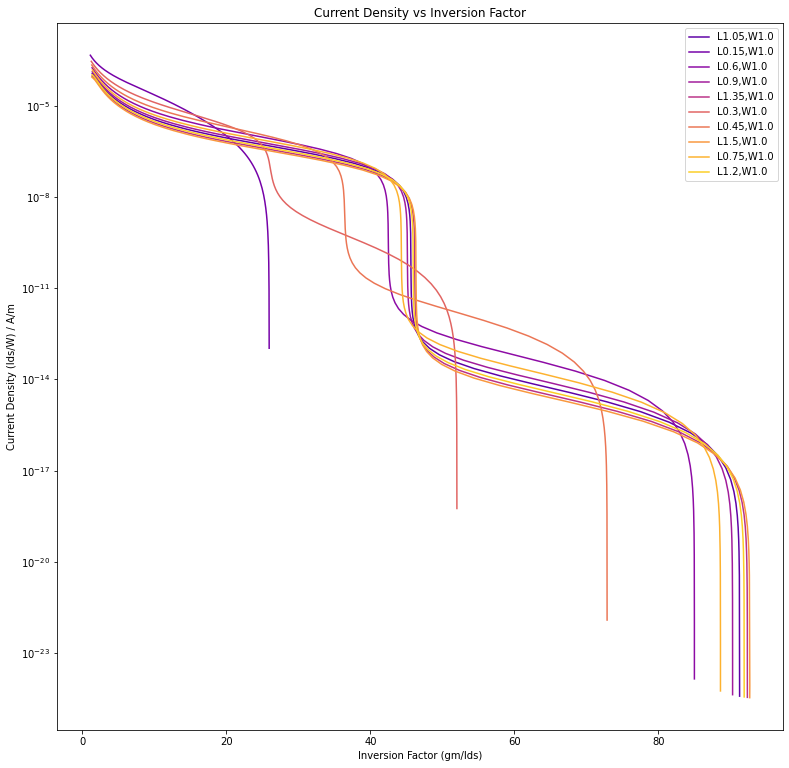

In [167]:
plot_sel = 1

# 0: Capacitance
# 1: gm/id vs. current density (id/w)
# 2: gm/id vs. intrinsic gain (gm/gds)
# 3: fT

legends = []
plt.rcParams['figure.figsize'] = [13, 13]
cmap = cm.get_cmap('plasma')
for i in range(len(lwlist)):
    color = cmap(i/len(lwlist))
    # Reduce the number of plots
    lwt = lwlist[i]
    L = lwt[0]
    W = lwt[1]
    # if (L%0.15<0.01) and (W%4<0.1):
    if W==1:
        print('at',i,'L',L,'W',W,'chosen')
        # Div by 8
        vgs_list = vgs_list_all[i,:]
        cgb_list = cgb_list_all[i,:]
        cgd_list = cgd_list_all[i,:]
        cgs_list = cgs_list_all[i,:]
        gds_list = gds_list_all[i,:]
        gm_list  = gm_list_all [i,:]
        id_list  = id_list_all [i,:]
        vth_list = vth_list_all[i,:]
        legends.append('L{},W{}'.format(L,W))
        
        if plot_sel==0:
            plt.plot(vgs_list, -np.array(cgs_list)/(L*W),color=color)
            plt.plot(vgs_list, -np.array(cgd_list)/(L*W),color=color)
            plt.plot(vgs_list, -np.array(cgb_list)/(L*W),color=color)
        elif plot_sel==1:
            plt.semilogy(np.array(gm_list)/np.array(id_list),np.array(id_list)/W,color=color)
        elif plot_sel==2:
            plt.plot(np.array(gm_list)/np.array(id_list),np.array(gm_list)/np.array(gds_list),color=color)
        elif plot_sel==3:
            # fT
            plt.plot(vgs_list, -gm_list/(2*np.pi*(cgs_list+cgd_list))/1e9, color=color)
        
        else: 
            print('Unknown Plot Type')
        # plt.plot(vgs_list,np.array(gm_list)/np.array(gds_list))
        # plt.plot(vgs_list,id_list)
plt.legend(legends)

if plot_sel==0:
    plt.xlabel('Vgs / V')
    plt.ylabel('Capacitance per Unit Area / F/(m^2)')
    plt.title('Unit Capacitance Plot')
elif plot_sel==1:
    plt.ylabel('Current Density (Ids/W) / A/m')
    plt.xlabel('Inversion Factor (gm/Ids)')
    plt.title('Current Density vs Inversion Factor')
elif plot_sel==2:
    plt.ylabel('Intrinsic Gain (gm/gds) / 1')
    plt.xlabel('Inversion Factor (gm/Ids)')    
    plt.title('Intrinsic Gain vs Inversion Factor')
elif plot_sel==3:
    plt.xlabel('Vgs / V')
    plt.ylabel('Transition Frequency / GHz')
    plt.title('Theoretical fT')
    
# plt.plot(vgs_list,np.array(gm_list)/np.array(gds_list))
# plt.title('Intrinsic Gain Plot of nfet, L=0.15, W=1.00, NF=1')
# plt.xlabel('Vgs/V')
# plt.ylabel('Intrisic Gain')

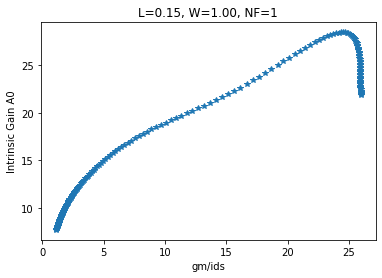

In [54]:
plt.plot(np.array(gm_list)/np.array(id_list),np.array(gm_list)/np.array(gds_list),'*')
plt.title('L=0.15, W=1.00, NF=1')
plt.xlabel('gm/ids')
plt.ylabel('Intrinsic Gain A0');

Text(0, 0.5, 'Gm/Id')

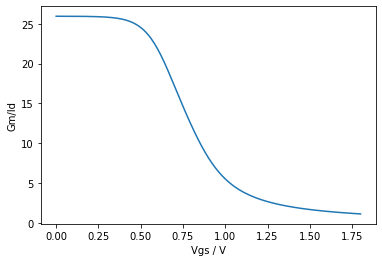

In [55]:
plt.plot(vgs_list,np.array(gm_list)/np.array(id_list))
plt.xlabel('Vgs / V')
plt.ylabel('Gm/Ids')

Text(0, 0.5, 'Caps/F')

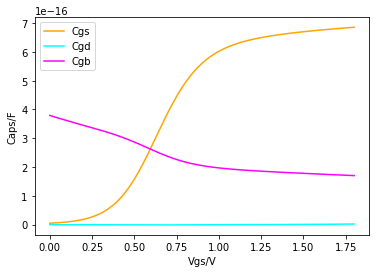

In [53]:
plt.plot(vgs_list, -np.array(cgs_list),'orange')
plt.plot(vgs_list, -np.array(cgd_list),'cyan')# Cgd is shorted?
plt.plot(vgs_list, -np.array(cgb_list),'magenta') 
plt.legend(['Cgs','Cgd','Cgb'])
plt.xlabel('Vgs/V')
plt.ylabel('Caps/F')

$$C_{gs}\approx4\times10^{-16} F$$
$$C_{gb}\approx2.5\times10^{-16} F$$

but hey, we're doing an LNA